In [2]:
#Parth Arjun Nyalchandani - 7088012
#Harman Singh - 6618704
#https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("smoke_detection_iot.csv",index_col=0)

In [7]:
df.head()

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0  1654733331          20.000        57.36          0        400   12306   
1  1654733332          20.015        56.67          0        400   12345   
2  1654733333          20.029        55.96          0        400   12374   
3  1654733334          20.044        55.28          0        400   12390   
4  1654733335          20.059        54.69          0        400   12403   

   Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
df.describe()

UTC  Temperature[C]   Humidity[%]     TVOC[ppb]     eCO2[ppm]  \
count  6.263000e+04    62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09       15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05       14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09      -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09       10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09       20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09       25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09       59.930000     75.200000  60000.000000  60000.000000   

             Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0         PM2.5  \
count  62630.000000  62630.000000   62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912     938.627649    100.594309    184.467770   
std      272.464305    609.513156       1.331344    922.524245   1976.305615   
min    10668.000000  15317.000000     930.852000      0.000000      0.000000   
25%    12830.000000  19435.000000     938.700000      1.280000      1.340000   
50%    12924.000000  19501.000000     938.816000      1.810000      1.880000   
75%    13109.000000  20078.000000     939.418000      2.090000      2.180000   
max    13803.000000  21410.000000     939.861000  14333.690000  45432.260000   

              NC0.5         NC1.0         NC2.5           CNT    Fire Alarm  
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000  
mean     491.463608    203.586487     80.049042  10511.386157      0.714626  
std     4265.661251   2214.738556   1083.383189   7597.870997      0.451596  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        8.820000      1.384000      0.033000   3625.250000      0.000000  
50%       12.450000      1.943000      0.044000   9336.000000      1.000000  
75%       14.420000      2.249000      0.051000  17164.750000      1.000000  
max    61482.030000  51914.680000  30026.438000  24993.000000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [ ]:
#These are the full forms of the values in the dataset.

#Air Temperature
#Air Humidity
#TVOC: Total Volatile Organic Compounds; measured in parts per billion (Source)
#eCO2: co2 equivalent concentration; calculated from different values like TVCO
#Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.)
#Raw Ethanol: raw ethanol gas (Source)
#Air Pressure
#PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
#Fire Alarm: ground truth is "1" if a fire is there
#CNT: Sample counter
#UTC: Timestamp UTC seconds
#NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);

In [7]:
df.head(20)

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0   1654733331          20.000        57.36          0        400   12306   
1   1654733332          20.015        56.67          0        400   12345   
2   1654733333          20.029        55.96          0        400   12374   
3   1654733334          20.044        55.28          0        400   12390   
4   1654733335          20.059        54.69          0        400   12403   
5   1654733336          20.073        54.12          0        400   12419   
6   1654733337          20.088        53.61          0        400   12432   
7   1654733338          20.103        53.20          0        400   12439   
8   1654733339          20.117        52.81          0        400   12448   
9   1654733340          20.132        52.46          0        400   12453   
10  1654733341          20.146        52.15          0        400   12454   
11  1654733342          20.161        51.84          0        400   12467   
12  1654733343          20.175        51.62          0        400   12467   
13  1654733344          20.190        51.39          0        400   12469   
14  1654733345          20.204        51.17          0        403   12468   
15  1654733346          20.219        50.99          0        400   12475   
16  1654733347          20.233        50.86          0        400   12480   
17  1654733348          20.248        50.66          0        400   12477   
18  1654733349          20.262        50.49          0        400   12481   
19  1654733350          20.277        50.27          0        406   12489   

    Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0         18520        939.735   0.00   0.00    0.0  0.000  0.000    0   
1         18651        939.744   0.00   0.00    0.0  0.000  0.000    1   
2         18764        939.738   0.00   0.00    0.0  0.000  0.000    2   
3         18849        939.736   0.00   0.00    0.0  0.000  0.000    3   
4         18921        939.744   0.00   0.00    0.0  0.000  0.000    4   
5         18998        939.725   0.00   0.00    0.0  0.000  0.000    5   
6         19058        939.738   0.00   0.00    0.0  0.000  0.000    6   
7         19114        939.758   0.00   0.00    0.0  0.000  0.000    7   
8         19155        939.758   0.00   0.00    0.0  0.000  0.000    8   
9         19195        939.756   0.90   3.78    0.0  4.369  2.780    9   
10        19230        939.757   0.89   3.71    0.0  4.289  2.730   10   
11        19264        939.754   0.84   3.51    0.0  4.053  2.580   11   
12        19299        939.755   0.81   3.38    0.0  3.909  2.488   12   
13        19317        939.758   0.74   3.11    0.0  3.588  2.284   13   
14        19338        939.742   0.71   2.96    0.0  3.419  2.176   14   
15        19362        939.741   0.64   2.66    0.0  3.077  1.959   15   
16        19382        939.758   0.60   2.52    0.0  2.908  1.851   16   
17        19400        939.764   0.53   2.23    0.0  2.580  1.642   17   
18        19422        939.761   0.50   2.10    0.0  2.423  1.542   18   
19        19451        939.752   0.41   1.72    0.0  1.987  1.265   19   

    Fire Alarm  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           0  
16           0  
17           0  
18           0  
19           0

In [8]:
df = df.drop(['UTC', 'CNT'], axis=1)

In [ ]:
#Dropped time and count of the data as they are not useful in this dataset and provide any value.

In [9]:
df

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0              20.000        57.36          0        400   12306        18520   
1              20.015        56.67          0        400   12345        18651   
2              20.029        55.96          0        400   12374        18764   
3              20.044        55.28          0        400   12390        18849   
4              20.059        54.69          0        400   12403        18921   
...               ...          ...        ...        ...     ...          ...   
62625          18.438        15.79        625        400   13723        20569   
62626          18.653        15.87        612        400   13731        20588   
62627          18.867        15.84        627        400   13725        20582   
62628          19.083        16.04        638        400   13712        20566   
62629          19.299        16.52        643        400   13696        20543   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
0            939.735   0.00   0.00   0.00  0.000  0.000           0  
1            939.744   0.00   0.00   0.00  0.000  0.000           0  
2            939.738   0.00   0.00   0.00  0.000  0.000           0  
3            939.736   0.00   0.00   0.00  0.000  0.000           0  
4            939.744   0.00   0.00   0.00  0.000  0.000           0  
...              ...    ...    ...    ...    ...    ...         ...  
62625        936.670   0.63   0.65   4.32  0.673  0.015           0  
62626        936.678   0.61   0.63   4.18  0.652  0.015           0  
62627        936.687   0.57   0.60   3.95  0.617  0.014           0  
62628        936.680   0.57   0.59   3.92  0.611  0.014           0  
62629        936.676   0.57   0.59   3.90  0.607  0.014           0  

[62630 rows x 13 columns]

In [10]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [ ]:
#No null values present in the dataset hence no requirement to remove rows.

In [11]:
duplicateRows = df[df.duplicated()]
duplicateRows

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
57079           26.90        45.15         22        415   12846        20760   
57129           27.12        44.50         55        412   12832        20717   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
57079        937.582   2.04   2.12  14.05  2.190  0.049           0  
57129        937.571   2.15   2.23  14.80  2.308  0.052           0

In [ ]:
#The number of duplicate rows is insignificant compared to the total rows hence no row removal was performed of duplicates.

array([0, 1], dtype=int64)

In [21]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

([<matplotlib.patches.Wedge at 0x2101678aa60>,
 [Text(-0.6867566913298193, 0.8592818204254757, '1'),
  Text(0.6867567717815868, -0.8592817561266699, '0')],
 [Text(-0.37459455890717414, 0.46869917477753215, '71%'),
  Text(0.37459460278995643, -0.46869913970545624, '29%')])

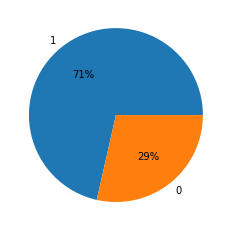

In [23]:
plt.pie(df['Fire Alarm'].value_counts(),labels = [1,0], autopct='%.0f%%')

In [ ]:
#Graph showing target split.

EDA

<AxesSubplot:>

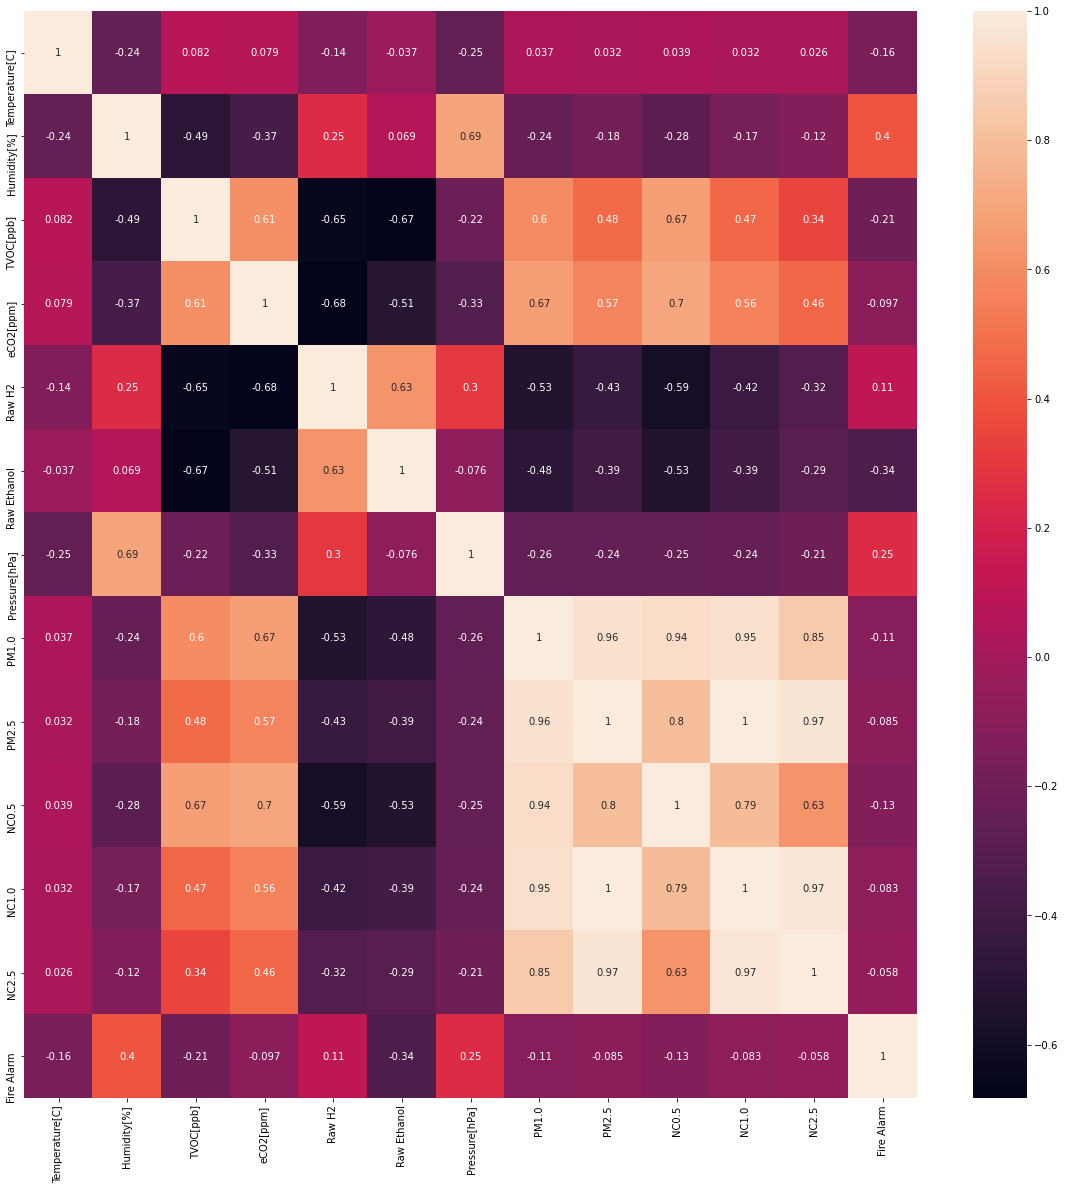

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

In [ ]:
#This is a classification problem hence not much correlation is seen in the graph.
# Small correlation is present between humidity and fire alaram.
#Other values dont show significant correlation with fire alaram.

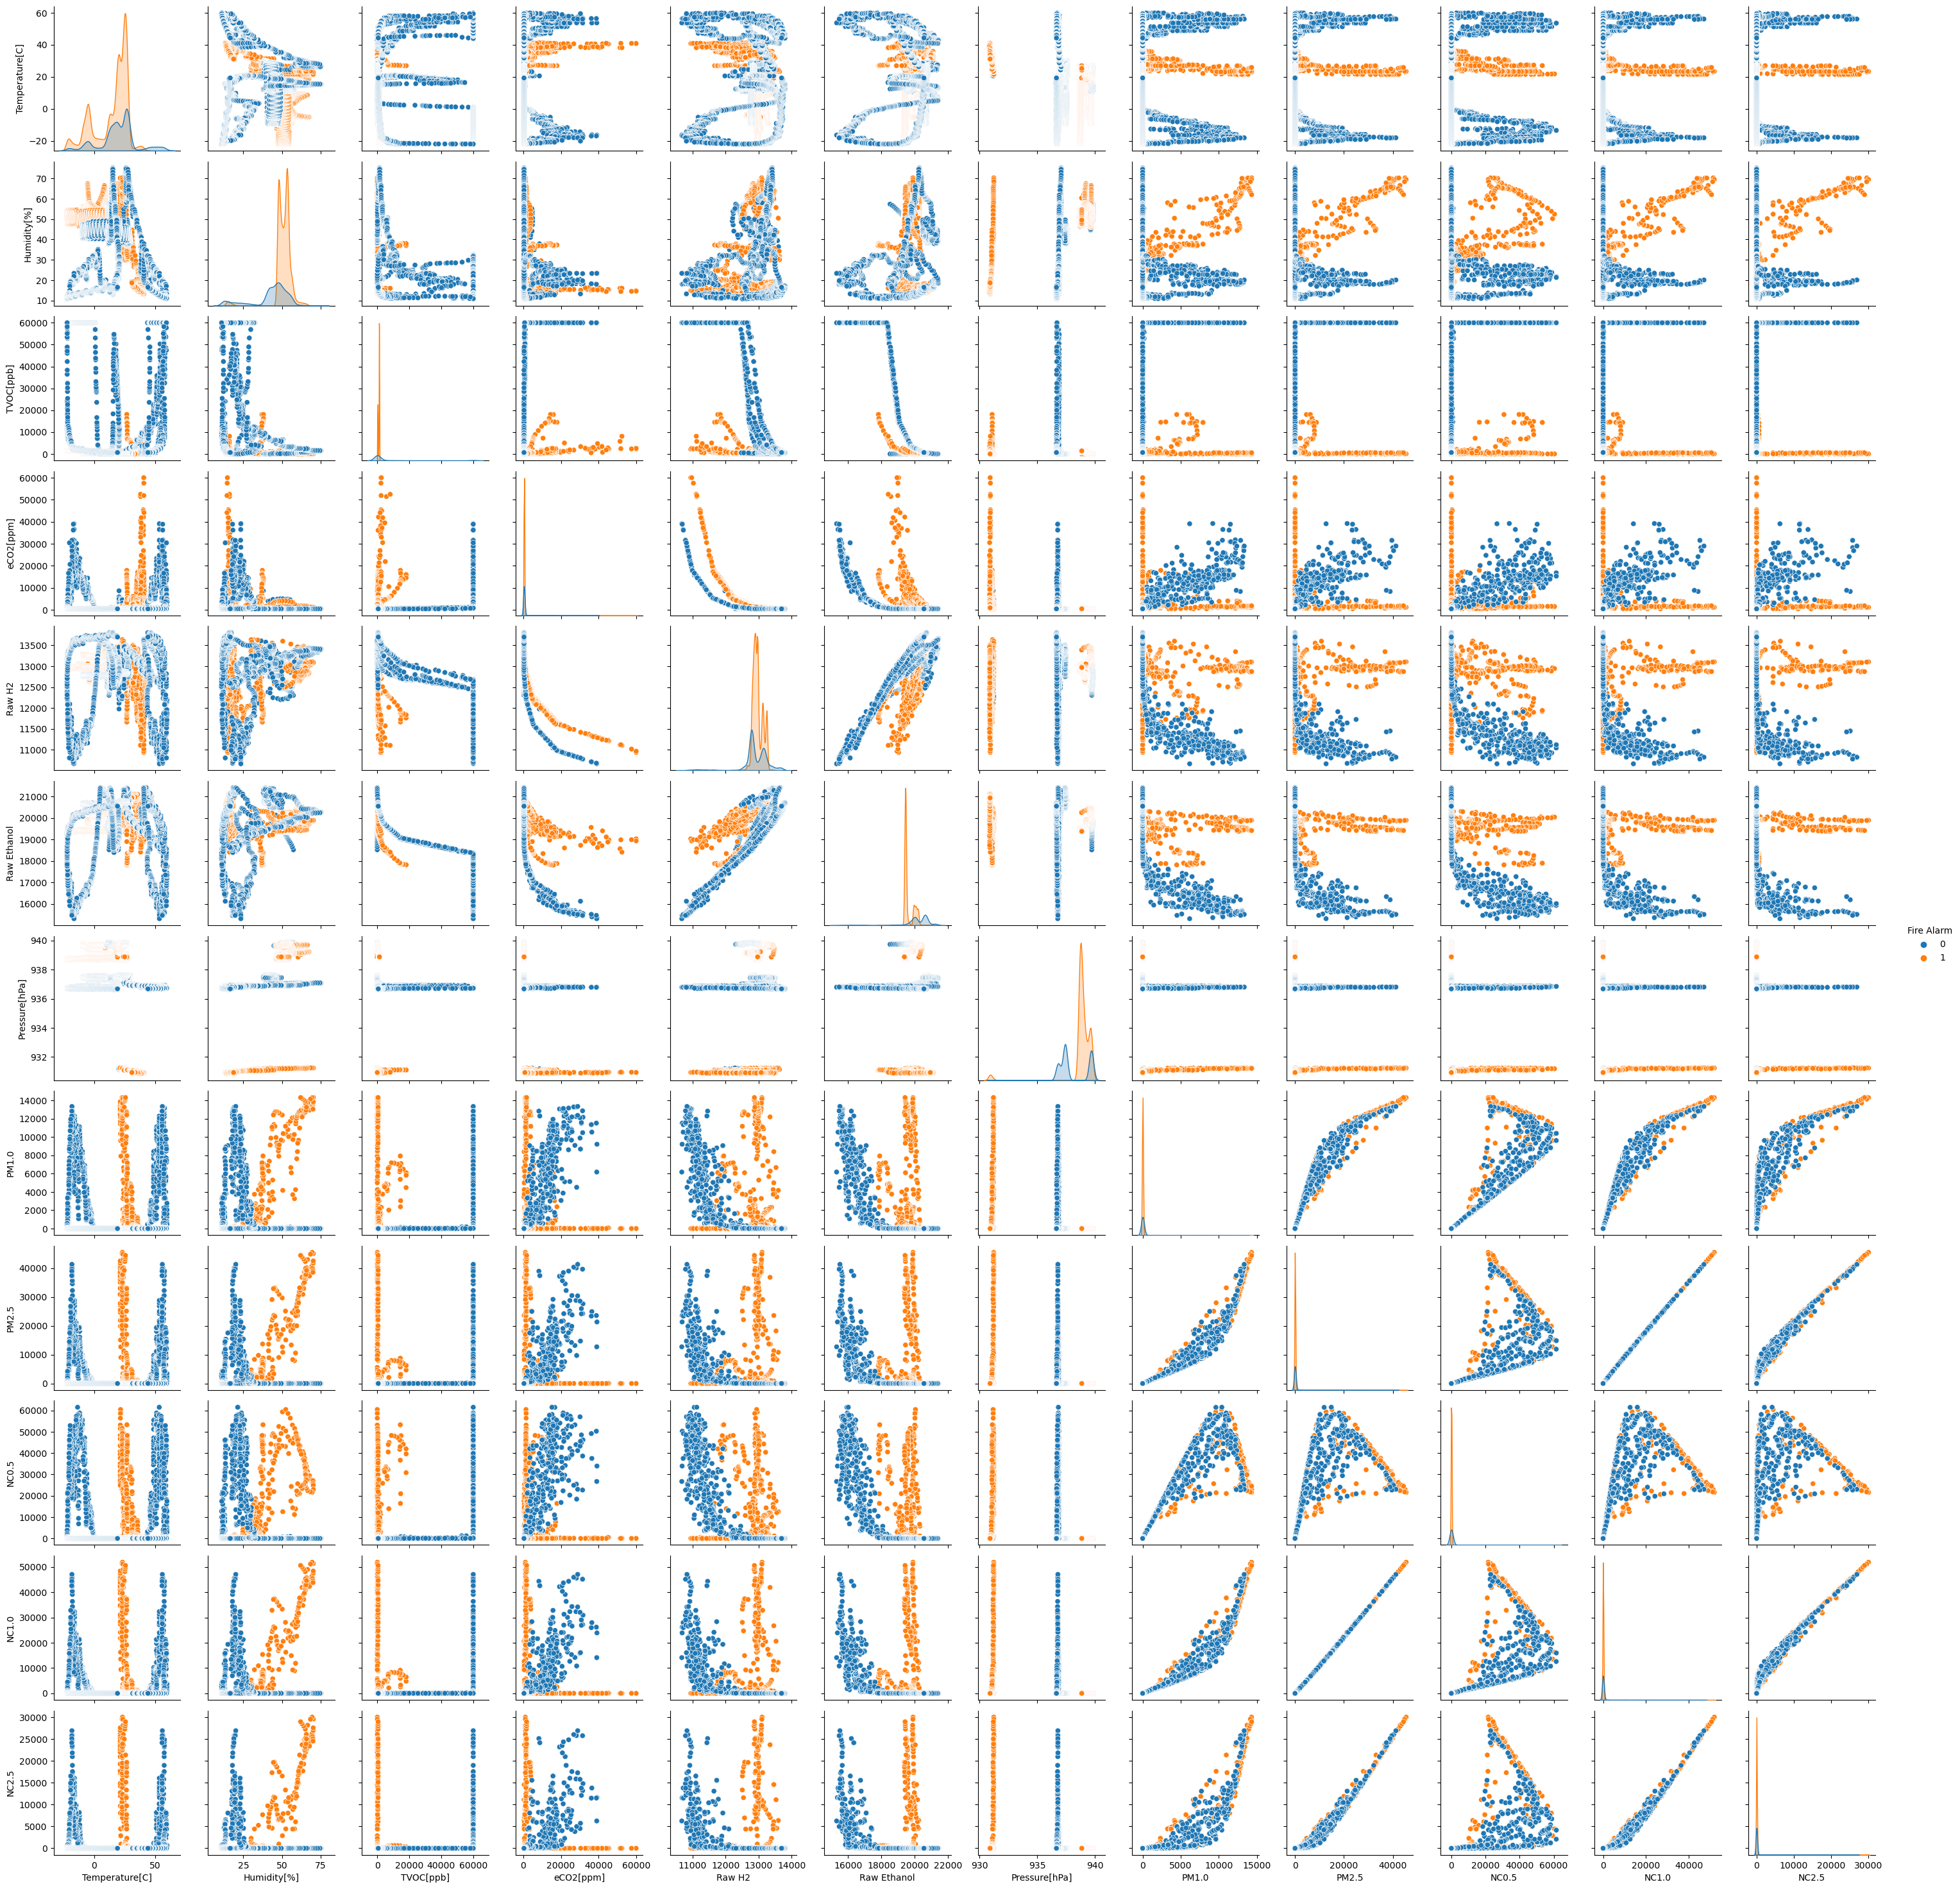

In [43]:
pplot=sns.pairplot(df,hue='Fire Alarm')

In [ ]:
#Most graphs of temperature and humidity show that seperation of data is present and KNN can be used in this case.

<AxesSubplot:xlabel='Temperature[C]', ylabel='NC0.5'>

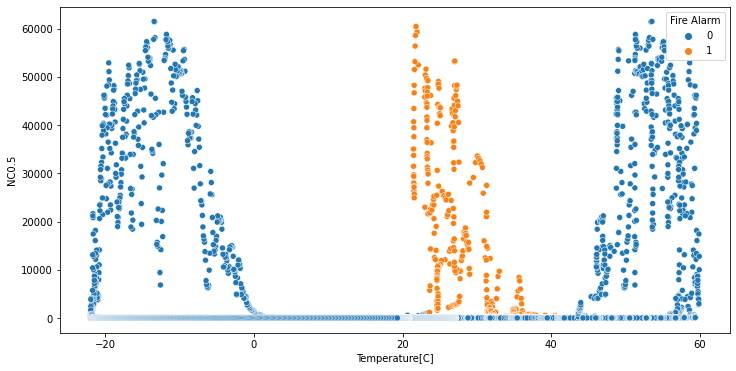

In [49]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Temperature[C]',y='NC0.5', hue='Fire Alarm')

<AxesSubplot:xlabel='Temperature[C]', ylabel='NC1.0'>

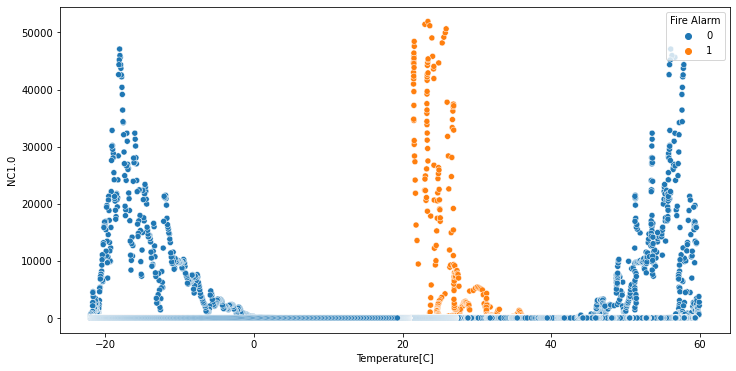

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Temperature[C]',y='NC1.0', hue='Fire Alarm')

<AxesSubplot:xlabel='Temperature[C]', ylabel='NC2.5'>

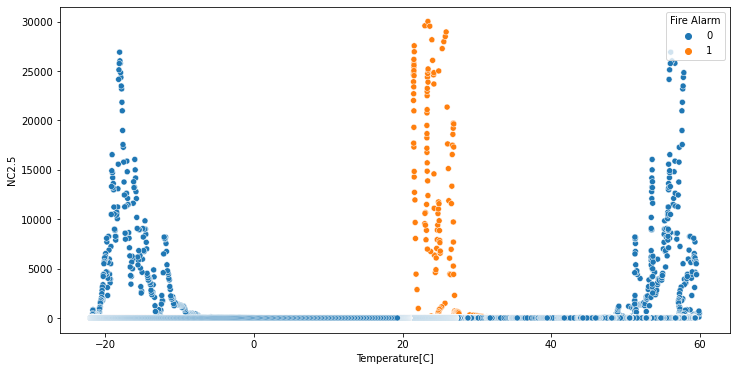

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Temperature[C]',y='NC2.5', hue='Fire Alarm')

In [ ]:
#All above 3 graphs of different NC values with temperature show that similar values are in close proximity with each other.
#We can see clear seperation of data, which is actual and false fire alarm.

<AxesSubplot:xlabel='Temperature[C]', ylabel='Count'>

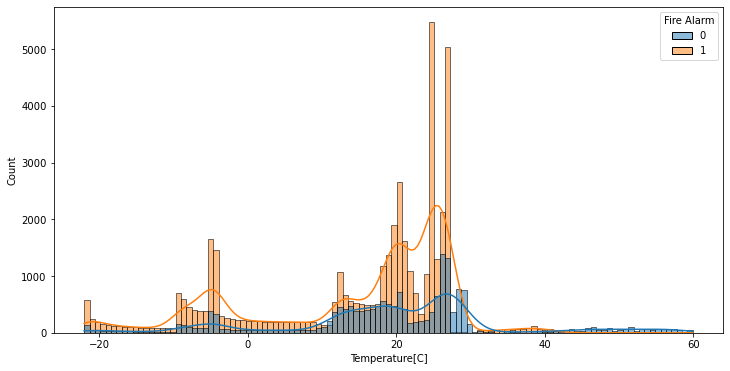

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Temperature[C]', hue='Fire Alarm', kde=True)

In [ ]:
#No significant information can be derived as temperature is highly varying.

<AxesSubplot:xlabel='Humidity[%]', ylabel='Count'>

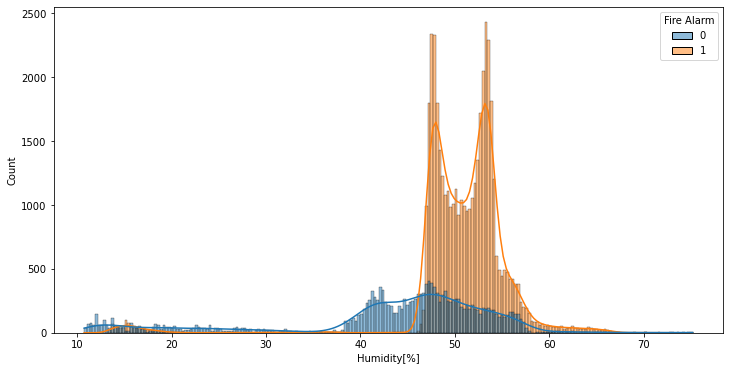

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Humidity[%]', hue='Fire Alarm', kde=True)

In [ ]:
#Between the range of 45% to 60% there is higher chance of true positive fire alarm.

/Users/partharjun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='TVOC[ppb]'>

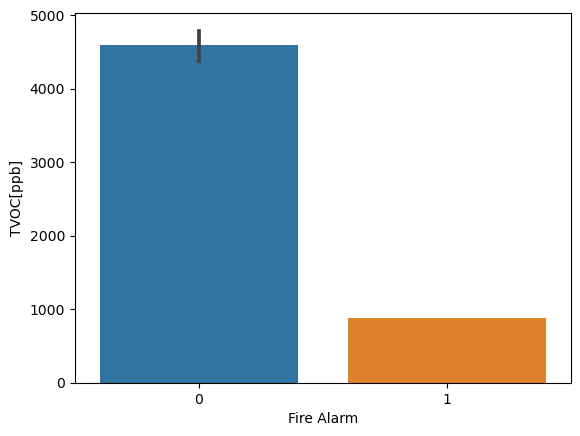

In [18]:
sns.barplot(df['Fire Alarm'] , df['TVOC[ppb]'])

In [ ]:
#Lower average TVOC results in higher likely hood of an actual true positive fire alarm.

In [5]:
df[df['Fire Alarm']==1]['TVOC[ppb]'].describe()

count    44757.000000
mean       882.013071
std        548.606072
min          0.000000
25%        332.000000
50%       1103.000000
75%       1208.000000
max      18062.000000
Name: TVOC[ppb], dtype: float64

/Users/partharjun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='PM1.0'>

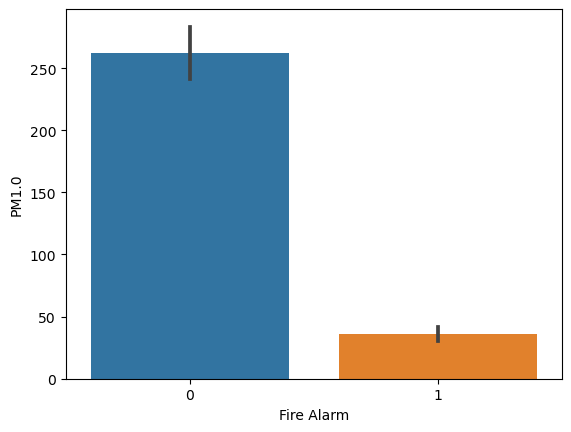

In [19]:
sns.barplot(df['Fire Alarm'] , df['PM1.0'])

In [ ]:
#Lower average PM1.0 results in higher likely hood of an actual true positive fire alarm.

/Users/partharjun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='PM2.5'>

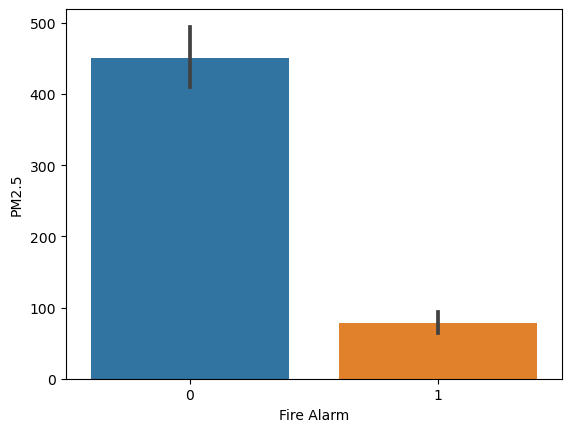

In [20]:
sns.barplot(df['Fire Alarm'] , df['PM2.5'])

In [ ]:
#Lower average PM2.5 results in higher likely hood of an actual true positive fire alarm.

/Users/partharjun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='Humidity[%]'>

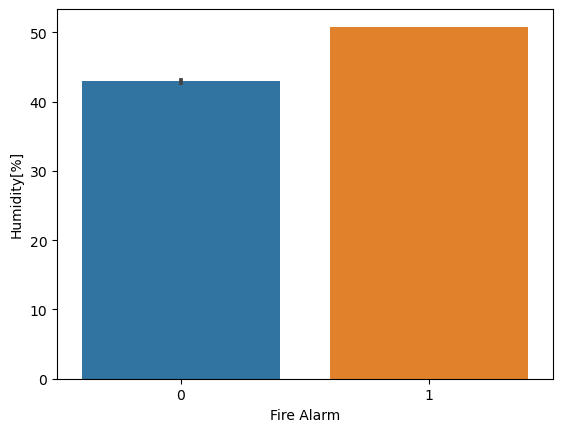

In [21]:
sns.barplot(df['Fire Alarm'] , df['Humidity[%]'])

In [ ]:
#Higher average Humidity[%] results in higher likely hood of an actual true positive fire alarm.

/Users/partharjun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='Temperature[C]'>

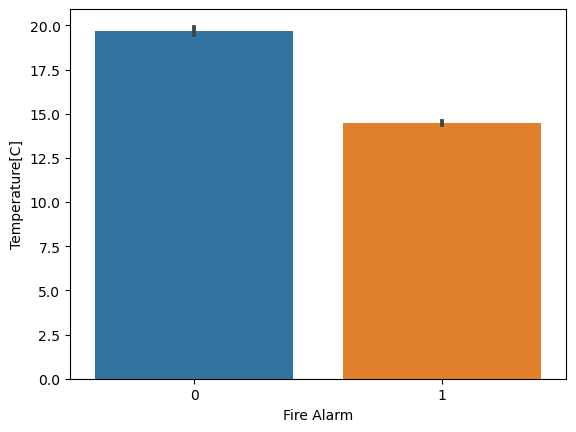

In [22]:
sns.barplot(df['Fire Alarm'] , df['Temperature[C]'])

In [ ]:
#Lower average Temperature[c] results in higher likely hood of an actual true positive fire alarm.

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fire Alarm', ylabel='Pressure[hPa]'>

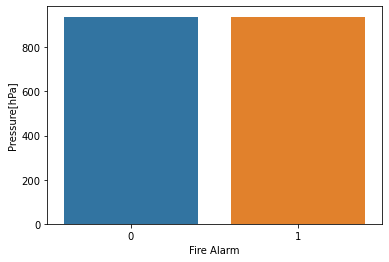

In [53]:
sns.barplot(df['Fire Alarm'] , df['Pressure[hPa]'])

In [ ]:
#No relation found for the above graph.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler() # Creating standard scaler to scale the features.

In [25]:
scaler.fit(df.drop('Fire Alarm',axis=1))

StandardScaler()

In [26]:
scaled_features=scaler.transform(df.drop('Fire Alarm',axis=1)) #Scaling the features.

In [27]:
scaled_features

array([[ 0.28062169,  0.99494707, -0.24861434, ..., -0.11521485,
        -0.09192422, -0.07388861],
       [ 0.2816663 ,  0.91711549, -0.24861434, ..., -0.11521485,
        -0.09192422, -0.07388861],
       [ 0.28264127,  0.83702792, -0.24861434, ..., -0.11521485,
        -0.09192422, -0.07388861],
       ...,
       [ 0.20171901, -3.68848353, -0.16834834, ..., -0.11428885,
        -0.09164563, -0.07387569],
       [ 0.21676136, -3.66592365, -0.16694016, ..., -0.11429588,
        -0.09164834, -0.07387569],
       [ 0.23180371, -3.61177995, -0.16630008, ..., -0.11430057,
        -0.09165014, -0.07387569]])

In [28]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  Raw Ethanol  \
0        0.280622     0.994947  -0.248614  -0.141679 -2.335935    -2.025006   
1        0.281666     0.917115  -0.248614  -0.141679 -2.192796    -1.810079   
2        0.282641     0.837028  -0.248614  -0.141679 -2.086359    -1.624683   
3        0.283686     0.760324  -0.248614  -0.141679 -2.027636    -1.485227   
4        0.284730     0.693773  -0.248614  -0.141679 -1.979923    -1.367099   

   Pressure[hPa]     PM1.0    PM2.5     NC0.5     NC1.0     NC2.5  
0       0.831761 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889  
1       0.838521 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889  
2       0.834014 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889  
3       0.832512 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889  
4       0.838521 -0.109043 -0.09334 -0.115215 -0.091924 -0.073889

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Splitting the dataset.
X_train,x_test,y_train,y_test=train_test_split(scaled_features,df['Fire Alarm'],test_size=0.30)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#Creating instance of KNN classifier with n=1 for to see how it performs and later with different n values.
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
pred=knn.predict(x_test) # Predicting using the model.

In [35]:
pred

array([0, 1, 1, ..., 1, 0, 1])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,pred))

[[ 5303     8]
 [   11 13467]]


In [ ]:
#5303 True positive detected.
#8 False positive were detected.
#11 False negatives were detected.
#13467 True Negatives were detected.

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5311
           1       1.00      1.00      1.00     13478

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [39]:
#Creating and running KNN with different n values to determine the best n value.
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

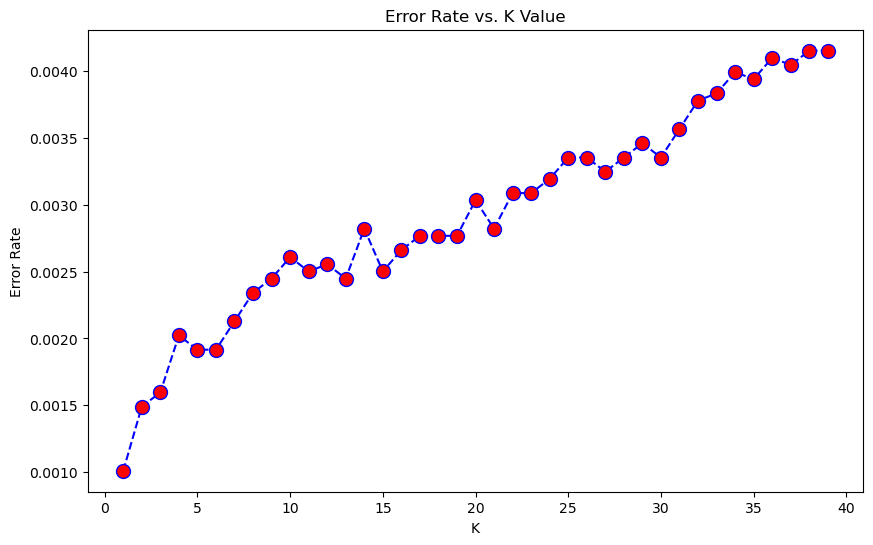

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#The above graph shows n=1 results in lowest error rate and higher k values result in higher error rate.

In [45]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,digits=5))

WITH K=1


[[ 5303     8]
 [   11 13467]]


              precision    recall  f1-score   support

           0    0.99793   0.99849   0.99821      5311
           1    0.99941   0.99918   0.99930     13478

    accuracy                        0.99899     18789
   macro avg    0.99867   0.99884   0.99875     18789
weighted avg    0.99899   0.99899   0.99899     18789



In [ ]:
#From the report and confusion matrix it can be seen that even though the accuracy, precision, recall and f1-score 
# is very high and good but for this case we need even higher accuracy.


In [46]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,digits=5))

WITH K=1


[[ 5279    32]
 [   26 13452]]


              precision    recall  f1-score   support

           0    0.99510   0.99397   0.99454      5311
           1    0.99763   0.99807   0.99785     13478

    accuracy                        0.99691     18789
   macro avg    0.99636   0.99602   0.99619     18789
weighted avg    0.99691   0.99691   0.99691     18789



In [ ]:
#We can see that 1/1000 chance might still predict that its not an actual fire when it is an actual fire, this could be catastrophic in real life scenarios.
#The dataset is controlled and done in a few enviorments and thus more data is needed in way more different environments.
#The dataset is collected in just 1 country and changing the envirnment might fail the predictions as different countries have different temperatures, humidity, air quality.

